# CS170 - Introduction to Data Science (Preparing data to model)
Instructions Answer each line item by replacing the blanks with the necessary operator or a value. Make sure the kernel is set to Python 3** Once done, right click the actual notebook page and print as PDF. Last part of the notebook is the code for timestamp from your computer - Run it!.

In [48]:
# import required package  
import pandas as pd  

#upload file using google colab

#from google.colab import files
#FA1 = files.upload() 

In [49]:
# read the csv adult data using the pandas package  
adult = pd.read_csv("Adult")  

Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set. Use a bar graph to confirm your proportions. 

In [50]:
# import required packages  
from sklearn.model_selection import train_test_split 
import random

In [51]:
# create partition. test is half  
adult_train, adult_test= train_test_split(adult, test_size = 0.5, random_state = 7)    

In [52]:
# collect proportion values in a dataframe   
df = pd.DataFrame({'Partition':['adult_train', 'adult_test'],  
	                   'Portion':[(adult_train.shape[0]/adult.shape[0]),  
	                              (adult_test.shape[0]/adult.shape[0])]  
	                   })  

<Axes: xlabel='Partition'>

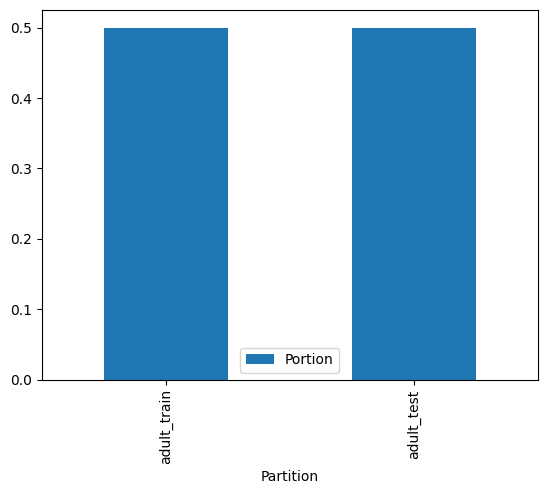

In [53]:
# create barplot  
df.set_index('Partition').plot(kind='bar')  

Identify the total number of records in the training data set, and how many records in the training data set have an income value of >50 K.  

In [54]:
print('The total number of records in the training dataset is', adult_train.shape[0])  	  

The total number of records in the training dataset is 12500


In [55]:
print('There are', adult_train.loc[adult_train['income']=='>50K.'].shape[0], 'records in the training data set that have “>50K” income')  

There are 2981 records in the training data set that have “>50K” income


Use your answers from the previous exercise to calculate how many records with income >50 K you need to resample in order to have 35% of the rebalanced data set have incomes of >50 K

In [56]:
# create variables needed to compute resampled record size  
greater_50K_records = adult_train.loc[adult_train['income']=='>50K.'].shape[0]  
total_records = adult_train.shape[0] 

In [57]:
# determin portion size to ressample (by 35%) 
(total_records * 0.35 - greater_50K_records) / 0.65

2144.6153846153848

Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50 K. 

In [58]:
# subset the records to be resampled  
to_resample = adult_train.loc[adult_train['income']=='>50K.']   

In [59]:
# resample the '>50K' records to the determined sample size  
our_resample = to_resample.sample(n = 2145, replace = True)  


In [60]:
# concatenate the sampled data with the rest of the training data so that it's rebalanced  
adult_train_rebal = pd.concat([adult_train, our_resample])  

The baseline is determined by looking at which income class has the greatest proportion of the data which is <=50K. If a model were to predict no >50K then the model would have an accuracy of 76%. Therefore the selected model would have to outperform this baseline model in order to have any use in the real world. 

In [61]:
# table proportion of income classes in training data  
adult_train_rebal['income'].value_counts() / adult_train_rebal.shape[0]

income
<=50K.    0.649983
>50K.     0.350017
Name: count, dtype: float64

Validate your partition by performing a two‐sample Z‐test for the difference in means for the mean age in the training set versus the mean age in the test set.

In [62]:
# No editing beyond this point, just run all the cells and make sure there is no errors. 

from numpy import sqrt, abs, round  
from scipy.stats import norm  
from statistics import stdev  
  
n1 = adult_train.shape[0]  
x1 = adult_train['age'].mean()  
sd1 = stdev(adult_train['age'])  
  
n2 = adult_test.shape[0]  
x2 = adult_test['age'].mean()  
sd2 = stdev(adult_test['age'])  

In [63]:
print("Shape of trainig data", n1)
print("Mean of age in the training data", x1)
print("Standard deviation of age in training date", sd1, "\n")

print("Shape of test data", n2)
print("Mean of age in the test data", x2)
print("Standard deviation of age in the test data", sd2)

Shape of trainig data 12500
Mean of age in the training data 38.61032
Standard deviation of age in training date 13.708895805408117 

Shape of test data 12500
Mean of age in the test data 38.60352
Standard deviation of age in the test data 13.667157235670935


In [64]:
# calculate the denominator pooled standard error  
pooledSE = sqrt(sd1**2/n1 + sd2**2/n2) 
print(pooledSE)

0.17314156314601958


In [65]:
#calculate z value  
z = round(((x1 - x2) - 0) /pooledSE,6)  
# caluculate p-value  
pval =  round(2*(1 - norm.cdf(abs(z))),6)  

In [66]:
print("Zed Value: ", z)
print("P-Value: ",pval)  

Zed Value:  0.039274
P-Value:  0.968672


Validate your partition by performing a two‐sample Z‐test for the difference in proportions for the proportion of >50 K records in the training set versus the proportion of >50 K records in the test set. 

In [67]:
n1 = adult_train.shape[0]  
x1 = adult_train.loc[adult_train['income']=='>50K.'].shape[0]  
p1 = x1 / n1  
  
n2 = adult_test.shape[0]  
x2 = adult_test.loc[adult_test['income']=='>50K.'].shape[0]   
p2 = x2 / n2  
  
p = (x1+x2)/(n1+n2)  
	  
#calculate z value  
z = round(((p1-p2)-0)/sqrt(p*(1-p)*(1/n1+1/n2)),6)  
  
14.	# caluculate p-value  
pval =  round(2*(1 - norm.cdf(abs(z))),6)   

In [68]:
print("Zed Value: ", z)
print("P-Value: ",pval)

Zed Value:  -0.32609
P-Value:  0.744356


7. Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted. Meaning that there is no evidence of significant difference between the >50K income proportions in the training and test datasets 